# IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [2]:
import cv2 as cv2

# EXTRACTING DATA FROM DATA SET

In [3]:
fldr="E:/New folder/UTKFace"

In [4]:
import os
files=os.listdir(fldr)

# CREATING LIST IMAGE FOR THE DATA

In [5]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

E:/New folder/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
E:/New folder/UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
E:/New folder/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
E:/New folder/UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
E:/New folder/UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
E:/New folder/UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
E:/New folder/UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
E:/New folder/UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
E:/New folder/UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
E:/New folder/UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
E:/New folder/UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
E:/New folder/UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
E:/New folder/UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
E:/New folder/UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
E:/New folder/UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
E:/New folder/UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
E:/New folder/UTKFace/10

# CREATING LIST FOR AGE AND GENDER SEPARATELY

In [6]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

# PLOTTING SAMPLE FROM THE DATASET

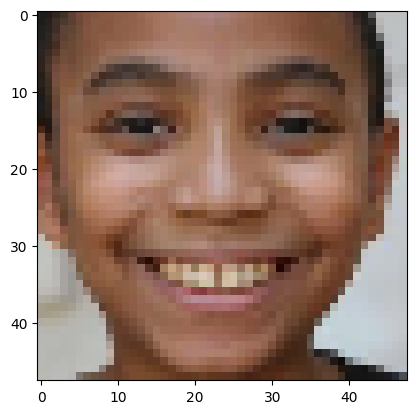

In [7]:
plt.imshow(images[87])

In [8]:
print(ages[87])

10


In [9]:
print(genders[87])

0


# SAVING IMAGE, AGE, GENDER ARRAY IN SYSTEM SEPERATELY

In [10]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [11]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

# CALCULATING TOTALE NUMBER OF MALE AND FEMALE PRESENT IN OUR DATA SET

In [12]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


# PLOTTING THE TOTALE NUMBER OF MALE AND FEMALE

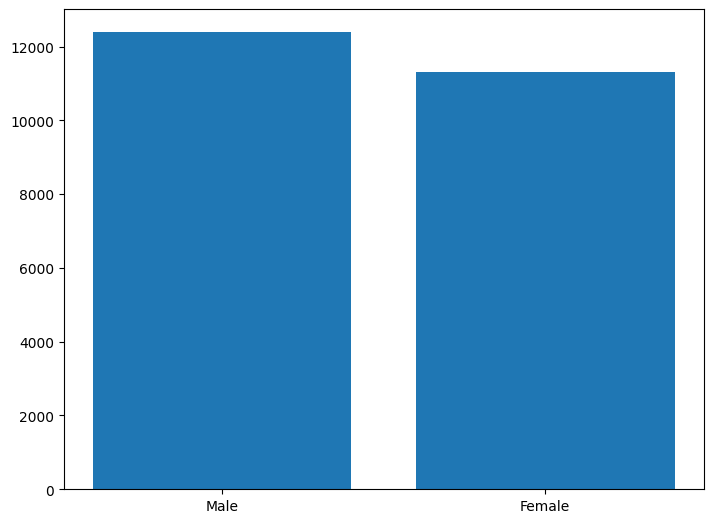

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

# CALCULATING THE RANGE OG AGES PRESENT IN OUR DATASET

In [14]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


# CONVERTING TOTALE AGE COUNT INTO LIST

In [15]:
val=values.tolist()
cnt=counts.tolist()

# PLOTTING THE AGE RANGE

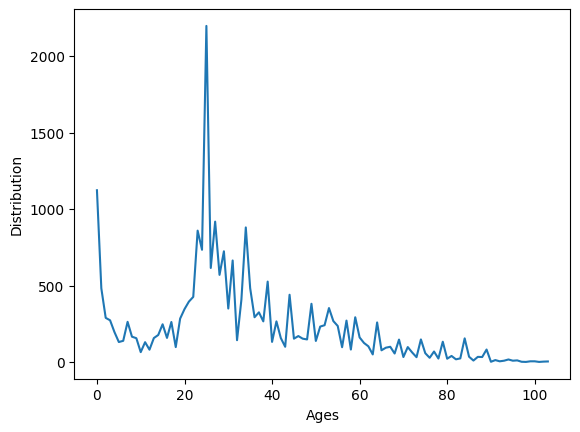

In [16]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

# DEFINING THE LABELS FOR OUTPUT

In [17]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

# CREATING THE COPY OF OUR CURRENT LIST FOR EASY USE

In [18]:
images_f_2=images_f/255

In [19]:
images_f_2.shape

(23708, 48, 48, 3)

In [20]:
labels_f=np.array(labels)

# SPLITTING THE DATASET INTO TEST TRAIN AND TRAIN TEST

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [23]:
Y_train[0:5]

array([[62,  0],
       [29,  0],
       [68,  0],
       [16,  0],
       [ 1,  0]])

# FURTHUR SPLITTING OF Y_TEST, Y_TRAIN FOR BETTER UNDERSTANDING

In [24]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [25]:
Y_train_2[0][0:5]

array([0, 0, 0, 0, 0])

In [26]:
Y_train_2[1][0:5]

array([62, 29, 68, 16,  1])

# CREATING OUR MODEL

In [27]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [28]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mse"],optimizer="Adam",metrics=["accuracy","mse"])
    return model

In [29]:
Model=model((48,48,3))

In [30]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 48, 48, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 48, 48, 32)        │             896 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 48, 48, 32)        │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 48, 48, 32)        │               0 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 24, 24, 32)        │               0 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 24, 24, 64)        │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 24, 24, 64)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 24, 24, 64)        │               0 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 12, 12, 64)        │               0 │ activation_1[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 12, 12, 128)       │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 12, 12, 128)       │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 12, 12, 128)       │               0 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 6, 6, 128)         │               0 │ activation_2[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 6, 6, 256)         │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 6, 6, 256)         │               0 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 6, 6, 256)         │               0 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

# INITIALIZING OUR MODEL

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [32]:
fle_s='Age_sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop= tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [33]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks= callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - age_out_mse: 522.8818 - loss: 523.9113 - sex_out_accuracy: 0.5257
Epoch 1: val_loss improved from inf to 360.77448, saving model to Age_sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 265s 836ms/step - age_out_mse: 522.5846 - loss: 523.6139 - sex_out_accuracy: 0.5257 - val_age_out_mse: 359.8127 - val_loss: 360.7745 - val_sex_out_accuracy: 0.5510
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 890ms/step - age_out_mse: 308.4205 - loss: 309.3730 - sex_out_accuracy: 0.6217
Epoch 2: val_loss did not improve from 360.77448
278/278 ━━━━━━━━━━━━━━━━━━━━ 270s 970ms/step - age_out_mse: 308.2888 - loss: 309.2412 - sex_out_accuracy: 0.6218 - val_age_out_mse: 364.5584 - val_loss: 365.5255 - val_sex_out_accuracy: 0.7290
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - age_out_mse: 198.9983 - loss: 199.9726 - sex_out_accuracy: 0.7071
Epoch 3: val_loss improved from 360.77448 to 189.97627, saving model to Age_sex_Detection.keras
278/278 ━━

# EVALUATING OUR CREATED MODEL

In [34]:
Model.evaluate(X_test,Y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - age_out_mse: 92.0943 - loss: 96.7839 - sex_out_accuracy: 0.8491


[95.95464324951172, 91.27529907226562, 0.850683331489563]

In [35]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step


In [36]:
pred[1]

array([[35.19879  ],
       [59.549244 ],
       [31.990696 ],
       ...,
       [28.557308 ],
       [26.583836 ],
       [ 2.3170412]], dtype=float32)

# PLOTTING OUR TOTAL LOSS IN MODEL

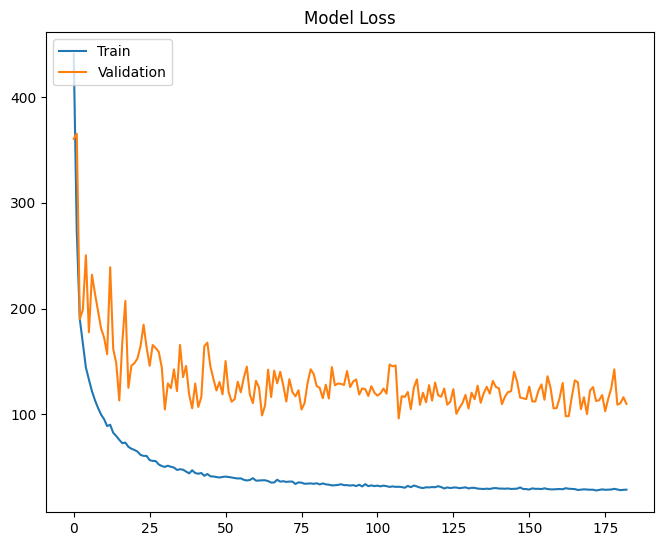

In [37]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# PLOTTING OUR TOTAL SEX MODEL ACCURACY

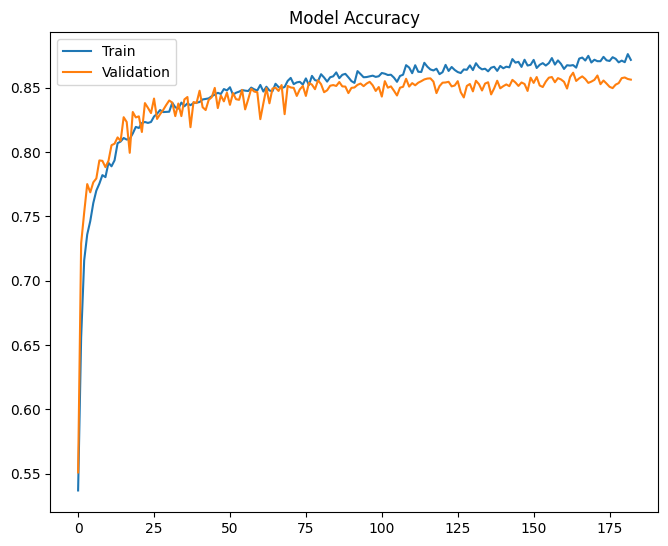

In [38]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# PLOTTING OUR TOTAL AGE ACCURACY

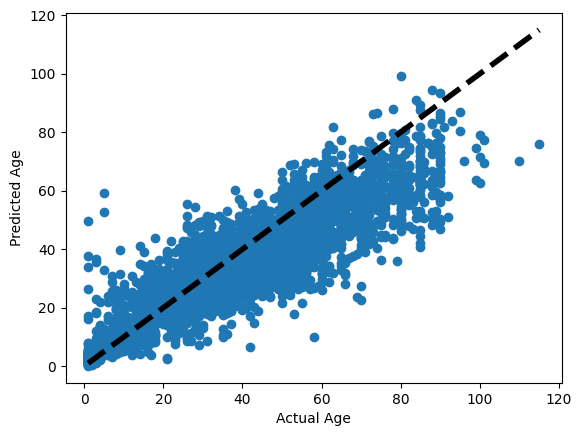

In [39]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

# CREATING CLASSIFICATION REPORT FOR GENDER

In [40]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1
    

C:\Users\hp\AppData\Local\Temp\ipykernel_13008\2690061568.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
report=classification_report(Y_test_2[0],Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3151
           1       0.87      0.80      0.83      2776

    accuracy                           0.85      5927
   macro avg       0.85      0.85      0.85      5927
weighted avg       0.85      0.85      0.85      5927



In [42]:
results=confusion_matrix(Y_test_2[0],Pred_l)

# HEATMAP FOR GENDER

<Axes: >

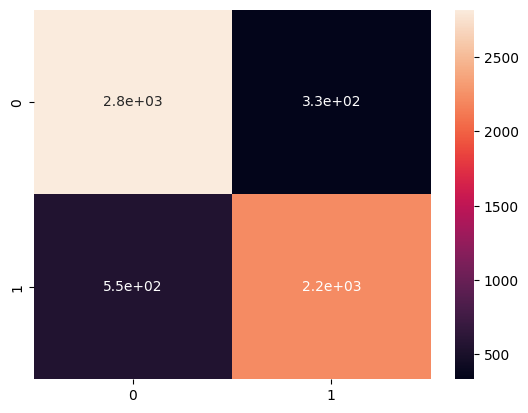

In [43]:
import seaborn as sns
sns.heatmap(results,annot=True)

# TESTING FOR OUR IMAGE OUTPUT 

In [44]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

# TEST 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted Age is 89
Predicted Gender is Female


C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


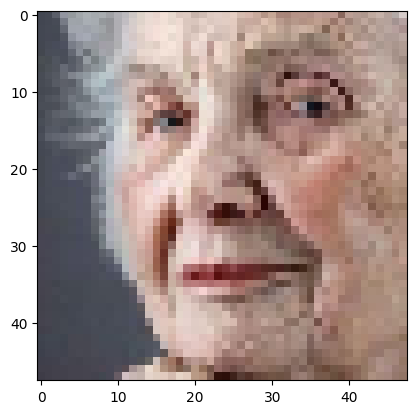

In [45]:
test_image(4,images_f,images_f_2,Model)

# TEST 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Age is 9
Predicted Gender is Male


C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


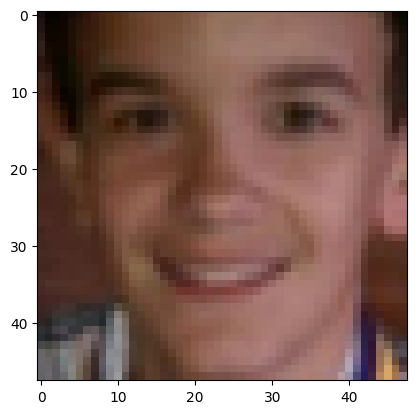

In [46]:
test_image(23,images_f,images_f_2,Model)

# TEST 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Age is 11
Predicted Gender is Male


C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


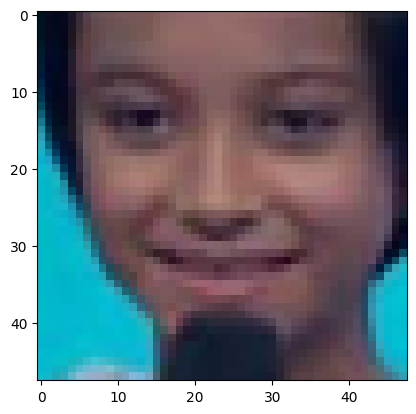

In [47]:
test_image(168,images_f,images_f_2,Model)

# TEST 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Age is 12
Predicted Gender is Male


C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


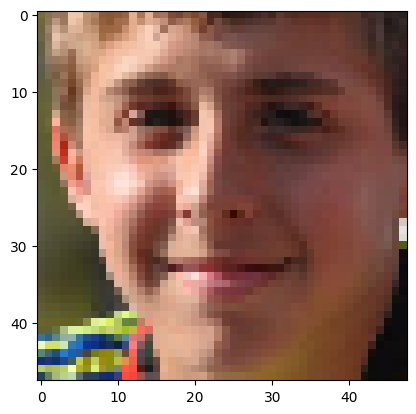

In [48]:
test_image(888,images_f,images_f_2,Model)

# TEST 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Age is 18
Predicted Gender is Female


C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


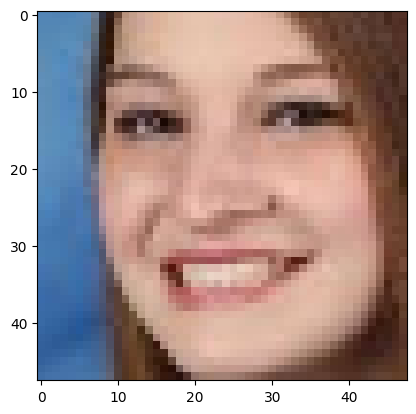

In [49]:
test_image(1288,images_f,images_f_2,Model)

# TEST 6

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted Age is 34
Predicted Gender is Male


C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


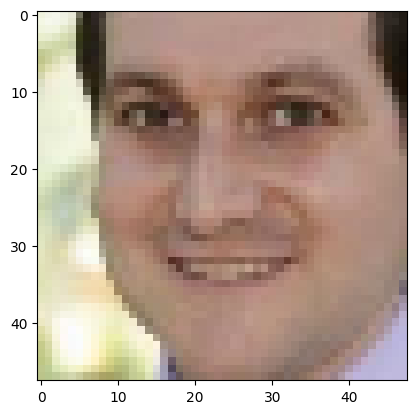

In [50]:
test_image(12885,images_f,images_f_2,Model)

# TEST 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Age is 80
Predicted Gender is Female


C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


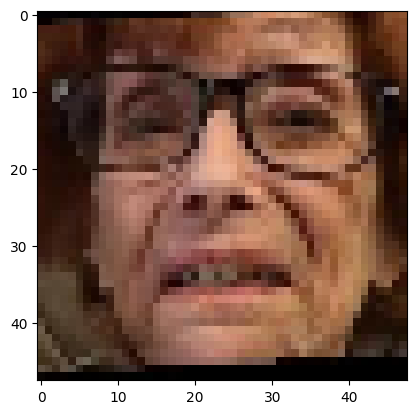

In [52]:
test_image(23000,images_f,images_f_2,Model)

# TEST 8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Age is 12
Predicted Gender is Female


C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


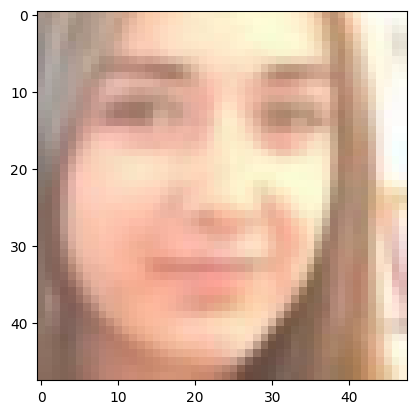

In [53]:
test_image(1300,images_f,images_f_2,Model)

# TEST 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted Age is 20
Predicted Gender is Female


C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


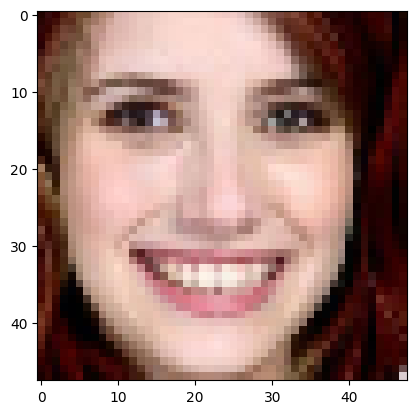

In [54]:
test_image(1366,images_f,images_f_2,Model)

# TEST 10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Age is 45
Predicted Gender is Male


C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\hp\AppData\Local\Temp\ipykernel_13008\964136747.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


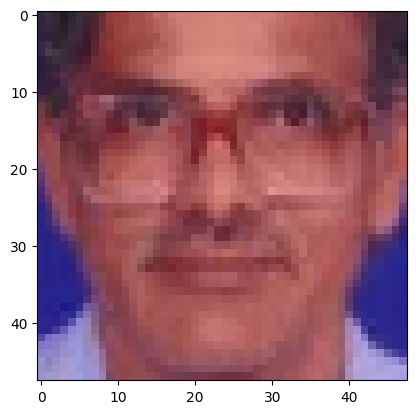

In [55]:
test_image(20000,images_f,images_f_2,Model)